Preparing the data for modeling

In [14]:
library(readr)
library(mechkar)
library(dplyr)
library(ggplot2)
#library(lightgbm)


In [15]:
data <- read.csv("C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/dffinal.csv")

In [16]:
dim(data)

[1] 9951   19

In [17]:
head(data)

,X,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito,log_weekly_sales
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,16,0,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.098612
2,2,60,0,154,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4.812184
3,3,50,0,154,0,1,0,0,0,0,0,0,1,0,0,1,0,1,4.779123
4,4,60,0,154,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1.945910
5,5,18,0,154,1,0,0,0,0,0,0,0,0,1,0,1,0,1,3.555348
6,6,18,0,154,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2.079442


In [18]:
data<-data[,-c(1)]

In [19]:
head(data)

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito,log_weekly_sales
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,16,0,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.098612
2,60,0,154,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4.812184
3,50,0,154,0,1,0,0,0,0,0,0,1,0,0,1,0,1,4.779123
4,60,0,154,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1.945910
5,18,0,154,1,0,0,0,0,0,0,0,0,1,0,1,0,1,3.555348
6,18,0,154,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2.079442


In [20]:
summary(data$log_weekly_sale)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6931  2.1972  2.9444  2.9548  3.7377  5.5910 

In [21]:
mode(data$log_weekly_sale)

[1] "numeric"

In [22]:
typeof(data$log_weekly_sale)

[1] "double"

In [23]:
nm <- names(data)
nm

[1] "weekly_transactions"                 "National_Ecuador_weekly_additionals"
 [3] "oil_weekly_max"                      "item_nbr_695758"                    
 [5] "item_nbr_699745"                     "item_nbr_741201"                    
 [7] "item_nbr_1110679"                    "item_nbr_1247036"                   
 [9] "onpromotion_0"                       "onpromotion_1"                      
[11] "store_nbr_46"                        "store_nbr_47"                       
[13] "store_nbr_48"                        "WW_2"                               
[15] "item_class_2802"                     "item_class_2850"                    
[17] "city_Quito"                          "log_weekly_sales"

In [24]:
data[] <- lapply( data, factor) 

In [25]:
data$weekly_transactions<-as.numeric(data$weekly_transactions)
data$National_Ecuador_weekly_additionals <-as.numeric(data$National_Ecuador_weekly_additionals )
data$oil_weekly_max<-as.numeric(data$oil_weekly_max)
data$log_weekly_sales<-as.numeric(levels(data$log_weekly_sales))[data$log_weekly_sales] 

In [26]:
summary(data)

 weekly_transactions National_Ecuador_weekly_additionals oil_weekly_max 
 Min.   :  1.0       Min.   :1.00                        Min.   :  1.0  
 1st Qu.:267.0       1st Qu.:1.00                        1st Qu.: 53.0  
 Median :491.0       Median :1.00                        Median :104.0  
 Mean   :490.4       Mean   :1.07                        Mean   :105.6  
 3rd Qu.:722.0       3rd Qu.:1.00                        3rd Qu.:154.0  
 Max.   :942.0       Max.   :3.00                        Max.   :212.0  
 item_nbr_695758 item_nbr_699745 item_nbr_741201 item_nbr_1110679
 0:8456          0:8420          0:8381          0:8427          
 1:1495          1:1531          1:1570          1:1524          
                                                                 
                                                                 
                                                                 
                                                                 
 item_nbr_1247036 onpromoti

In [27]:
vn <- names(data)
vn

[1] "weekly_transactions"                 "National_Ecuador_weekly_additionals"
 [3] "oil_weekly_max"                      "item_nbr_695758"                    
 [5] "item_nbr_699745"                     "item_nbr_741201"                    
 [7] "item_nbr_1110679"                    "item_nbr_1247036"                   
 [9] "onpromotion_0"                       "onpromotion_1"                      
[11] "store_nbr_46"                        "store_nbr_47"                       
[13] "store_nbr_48"                        "WW_2"                               
[15] "item_class_2802"                     "item_class_2850"                    
[17] "city_Quito"                          "log_weekly_sales"

In [15]:
#library(devtools)
#install_github("karpatit/mechkar")
require(mechkar)

In [16]:
Table1(data = data,x = vn,y = "log_weekly_sales")

Warning message in Table1(data = data, x = vn, y = "log_weekly_sales"):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
The dependent variable has more than 8 levels, table too large!



V1,V2,Pop
<chr>,<chr>,<chr>
Variables,Categories,Population
Individuals,n,9951
weekly_transactions,Mean (SD),490.4 (267.6)
weekly_transactions,Median (IQR),491.0 (267.0-722.0)
weekly_transactions,Missing (%),--
National_Ecuador_weekly_additionals,Mean (SD),1.1 (0.3)
National_Ecuador_weekly_additionals,Median (IQR),1.0 (1.0-1.0)
National_Ecuador_weekly_additionals,Missing (%),--
oil_weekly_max,Mean (SD),105.6 (62.0)


### Test Dataset ####

In [17]:
tab1 <- train_test(data = data[,vn], train_name = "temp", test_name = "test",prop = 0.8, seed = 5, tableone=T)

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |==================================================================    |  95%

 

You got a perfectly balanced training and test datasets

 



In [18]:
dim(temp)
dim(test)

[1] 7960   18

[1] 1991   18

In [19]:
head(temp)

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito,log_weekly_sales
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
2255,212,1,190,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1.098612
6859,218,1,68,0,1,0,0,0,0,1,0,0,1,0,1,0,1,2.302585
1833,515,1,206,0,0,0,0,1,1,0,0,0,1,0,0,0,1,3.295837
3797,836,1,86,0,0,0,0,1,1,0,0,1,0,0,0,0,1,3.610918
7239,189,1,34,0,0,0,1,0,1,0,0,0,1,0,0,1,1,2.772589
1527,114,1,204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.564949


# Save both balanced train (temp) & test data sets to use during Hyperparameters finetuning
### (Table1 doesn't run in Python in order to verify the partition balance)

In [20]:
X_train <- temp[,-c(18)]
head(X_train)

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2255,212,1,190,1,0,0,0,0,0,1,0,0,0,0,1,0,0
6859,218,1,68,0,1,0,0,0,0,1,0,0,1,0,1,0,1
1833,515,1,206,0,0,0,0,1,1,0,0,0,1,0,0,0,1
3797,836,1,86,0,0,0,0,1,1,0,0,1,0,0,0,0,1
7239,189,1,34,0,0,0,1,0,1,0,0,0,1,0,0,1,1
1527,114,1,204,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
y_train <- temp$log_weekly_sales
y_train

[1] 1.0986123 2.3025851 3.2958369 3.6109179 2.7725887 2.5649494 2.7725887
   [8] 1.0986123 2.9444390 1.3862944 4.3174881 1.7917595 4.4426513 5.0625950
  [15] 2.3978953 1.6094379 3.1354942 3.3672958 2.9957323 3.1780538 3.7841896
  [22] 2.1972246 3.8501476 2.0794415 2.9957323 1.6094379 2.4849067 3.1780538
  [29] 3.3672958 4.6443909 3.5835189 4.2904594 2.5649494 3.0445224 1.9459101
  [36] 1.9459101 3.2958369 2.1972246 4.3820266 2.3978953 1.6094379 4.2626799
  [43] 4.4543473 5.1119878 1.3862944 4.5432948 1.9459101 1.3862944 3.9889840
  [50] 4.8520303 1.0986123 3.4339872 2.5649494 3.0445224 3.7376696 2.9957323
  [57] 2.3025851 2.7725887 3.9120230 3.4657359 1.7917595 1.3862944 4.0430513
  [64] 3.4965076 4.3307333 2.7080502 2.8332133 3.8501476 4.5747110 3.7612001
  [71] 1.3862944 3.8918203 3.7135721 2.6390573 2.6390573 2.8332133 4.2626799
  [78] 2.8332133 2.7080502 2.8903718 3.3322045 3.3672958 2.5649494 2.0794415
  [85] 2.5649494 1.9459101 4.3820266 1.3862944 3.4339872 2.1972246 2.6390573
  [92] 2.1972246 4.0073332 2.0794415 3.5553481 1.7917595 2.9957323 3.5835189
  [99] 2.0794415 2.9444390 2.1972246 3.9318256 3.9889840 3.5835189 2.0794415
 [106] 1.6094379 3.0445224 2.4849067 2.4849067 2.0794415 3.7376696 4.5217886
 [113] 4.2341065 4.1743873 3.9318256 4.1431347 0.6931472 2.4849067 4.1588831
 [120] 1.3862944 1.0986123 1.9459101 4.8040210 4.2341065 3.6109179 4.5325995
 [127] 1.9459101 4.3820266 3.3322045 2.3025851 1.6094379 3.7612001 4.1431347
 [134] 3.9120230 3.5835189 2.8903718 2.0794415 4.0073332 2.6390573 3.7841896
 [141] 4.6539604 4.3174881 2.9444390 2.7080502 3.7612001 1.7917595 4.5108595
 [148] 1.6094379 3.7376696 2.9957323 3.3322045 0.6931472 2.0794415 2.9444390
 [155] 3.1354942 3.5553481 2.0794415 3.4965076 2.9444390 2.0794415 3.5835189
 [162] 5.2522734 3.2188758 3.4657359 2.4849067 3.4339872 1.6094379 3.5553481
 [169] 2.0794415 2.3025851 2.0794415 2.4849067 3.1780538 2.3978953 2.7725887
 [176] 3.1354942 3.7135721 2.0794415 1.9459101 2.8332133 3.5835189 2.1972246
 [183] 4.8598124 1.3862944 2.1972246 3.5263605 3.5553481 3.2580965 1.7917595
 [190] 3.0910425 2.8332133 3.3672958 3.0445224 3.4965076 2.6390573 4.3694479
 [197] 3.2580965 3.2580965 4.3567088 1.0986123 3.8712010 2.1972246 3.7612001
 [204] 2.1972246 4.2341065 2.4849067 2.3978953 3.4965076 2.6390573 2.3978953
 [211] 1.9459101 1.3862944 3.7612001 4.4426513 2.6390573 3.6888795 2.3025851
 [218] 4.0943446 4.2766661 3.2580965 3.9702919 2.7725887 2.0794415 2.7080502
 [225] 2.3978953 3.0910425 1.7917595 1.0986123 1.3862944 4.6347290 3.7376696
 [232] 3.7135721 2.8903718 2.7725887 3.0445224 4.8362819 3.6375862 1.7917595
 [239] 2.9444390 1.6094379 2.7725887 2.0794415 0.6931472 2.9444390 3.9120230
 [246] 4.7095302 2.6390573 3.2188758 2.4849067 2.0794415 2.3025851 2.7725887
 [253] 4.0073332 2.0794415 2.3025851 4.1108739 2.9957323 4.1896547 3.6888795
 [260] 2.4849067 3.9120230 2.1972246 1.0986123 2.6390573 3.4657359 2.3978953
 [267] 1.3862944 1.9459101 2.9957323 2.8332133 4.3567088 5.3798974 4.4886364
 [274] 2.7725887 2.8332133 3.1354942 2.0794415 4.1108739 3.4657359 3.4657359
 [281] 4.0253517 3.8066625 2.0794415 3.4339872 2.9957323 3.2580965 2.7725887
 [288] 3.9120230 1.0986123 3.4965076 2.3025851 2.8332133 1.3862944 3.5553481
 [295] 4.0604430 1.6094379 3.5263605 1.0986123 3.5553481 1.9459101 4.0943446
 [302] 3.5553481 1.0986123 2.0794415 3.2580965 2.4849067 2.5649494 3.2580965
 [309] 2.3025851 3.2580965 3.2580965 2.8903718 2.8332133 2.5649494 2.8903718
 [316] 3.6375862 2.1972246 4.2626799 3.4965076 1.9459101 2.6390573 3.4657359
 [323] 3.4657359 0.6931472 4.6821312 4.5217886 3.5263605 1.6094379 3.8066625
 [330] 2.8332133 2.4849067 4.4998097 4.2195077 4.1271344 2.0794415 1.9459101
 [337] 2.7080502 2.9957323 4.1743873 2.1972246 1.3862944 1.6094379 2.0794415
 [344] 2.1972246 2.7725887 4.2341065 4.3174881 0.6931472 2.4849067 2.9957323
 [351] 4.2484952 3.8501476 3.1780538 5.3132060 4.2904594 1.3862944 3.0910425
 [358] 2.3025851 1.0986123 2.1972246 1.3862944 2.3978953 3.7135721 3.2580965

In [22]:
dim(X_train)
length(y_train)

[1] 7960   17

[1] 7960

In [23]:
X_test <- test[,-c(18)]
head(X_test)

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
3,50,1,155,0,1,0,0,0,0,0,0,1,0,0,1,0,1
4,60,1,155,0,0,0,0,0,0,0,1,0,0,0,0,1,1
12,16,1,155,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23,305,1,160,0,0,0,0,0,0,0,0,0,1,1,0,0,1
24,116,1,160,0,0,0,0,0,0,0,0,0,0,1,0,0,0
30,305,1,160,0,0,0,0,0,0,0,0,0,1,1,0,1,1


In [24]:
y_test <- test$log_weekly_sales
y_test

[1] 4.7791235 1.9459101 3.6109179 3.6635616 1.6094379 2.3025851 5.3659760
   [8] 2.4849067 3.2580965 3.6888795 2.9957323 1.9459101 4.0430513 5.4595855
  [15] 4.1431347 3.5263605 1.9459101 1.0986123 1.6094379 2.8903718 3.5263605
  [22] 3.1354942 1.3862944 3.4657359 3.4657359 3.8286414 4.6634391 3.4011974
  [29] 2.3025851 0.6931472 4.3694479 4.5217886 2.5649494 1.0986123 3.4965076
  [36] 2.5649494 3.5553481 3.4339872 4.3438054 3.1354942 3.7135721 4.3694479
  [43] 3.8501476 3.0910425 4.3567088 2.0794415 2.0794415 3.7841896 4.4067192
  [50] 3.4011974 1.3862944 3.5263605 2.8903718 3.6375862 3.8918203 2.8332133
  [57] 2.8903718 4.3944492 3.6109179 3.2958369 3.7135721 3.9120230 2.8903718
  [64] 3.0910425 3.1780538 4.0775374 3.4011974 4.7273878 3.5553481 4.4188406
  [71] 3.2580965 3.4657359 3.5835189 4.7361984 2.1972246 5.4026774 4.0943446
  [78] 3.5835189 2.7725887 4.5325995 4.5108595 3.4011974 3.7135721 4.2904594
  [85] 5.2040067 3.5553481 4.0604430 3.6109179 0.6931472 3.4339872 2.6390573
  [92] 3.7376696 4.8121844 3.7135721 4.3040651 3.7135721 4.8978398 3.8066625
  [99] 2.3978953 2.4849067 3.4657359 4.2195077 2.4849067 3.4011974 2.9444390
 [106] 4.2766661 1.7917595 1.9459101 3.7841896 2.4849067 3.0445224 2.7080502
 [113] 1.9459101 4.1271344 4.3307333 3.5553481 3.0445224 4.4998097 4.6347290
 [120] 4.0943446 3.0910425 4.0604430 3.3672958 2.6390573 3.6888795 4.0073332
 [127] 4.6539604 4.1896547 3.8501476 4.7004804 2.3978953 4.3694479 4.3567088
 [134] 2.8903718 4.2341065 2.8903718 3.2188758 2.9957323 4.8121844 3.4339872
 [141] 4.5538769 1.0986123 3.8918203 2.1972246 3.2958369 3.3322045 3.6375862
 [148] 4.4308168 4.3438054 2.4849067 2.9957323 3.4011974 4.2904594 5.0751738
 [155] 2.7080502 2.8332133 4.1588831 4.6051702 4.3567088 1.7917595 2.3978953
 [162] 4.5217886 3.4657359 3.0910425 3.5835189 2.1972246 3.2188758 3.4011974
 [169] 4.5747110 4.1588831 5.0689042 3.7841896 1.9459101 3.3672958 5.2729996
 [176] 2.8903718 1.0986123 3.9889840 3.8712010 3.4965076 2.7080502 2.0794415
 [183] 3.3672958 3.0445224 3.3672958 3.6109179 2.3978953 3.1354942 3.9889840
 [190] 3.2580965 3.5835189 4.0604430 3.3322045 3.4657359 1.6094379 3.4657359
 [197] 2.1972246 3.7612001 2.3978953 2.0794415 2.8903718 3.4339872 4.2904594
 [204] 0.6931472 2.5649494 2.4849067 1.7917595 2.7725887 2.5649494 2.3978953
 [211] 4.3694479 3.6375862 1.6094379 3.9889840 2.7725887 2.3978953 2.4849067
 [218] 2.8903718 4.3820266 3.9702919 1.3862944 2.8332133 4.5217886 2.7080502
 [225] 2.7725887 3.4339872 2.0794415 3.4339872 3.8286414 2.1972246 2.6390573
 [232] 3.0910425 2.1972246 3.2958369 3.4339872 4.4773368 3.9120230 1.0986123
 [239] 3.4339872 1.6094379 4.3944492 3.2580965 3.7376696 3.9318256 3.4339872
 [246] 3.5835189 3.0445224 4.8520303 4.5747110 3.5553481 4.0943446 3.4657359
 [253] 4.5747110 1.7917595 3.7376696 4.2904594 2.5649494 3.2580965 3.4657359
 [260] 4.0604430 4.2766661 3.7612001 3.8066625 3.8286414 3.5553481 3.3322045
 [267] 3.7841896 4.0430513 3.0910425 1.6094379 4.4188406 3.5835189 2.4849067
 [274] 3.3672958 4.4426513 3.5835189 3.4965076 4.5108595 3.4339872 4.4886364
 [281] 2.7080502 4.4188406 4.3820266 3.4011974 3.8501476 4.7184989 4.3694479
 [288] 3.3322045 4.0073332 3.6109179 3.8066625 4.2626799 3.0445224 3.6888795
 [295] 5.3278762 3.1354942 4.4308168 2.6390573 4.9487599 2.6390573 4.8040210
 [302] 2.1972246 3.6109179 2.3978953 2.3025851 3.2580965 3.8712010 3.8918203
 [309] 4.2341065 3.8066625 3.1354942 4.0604430 3.6375862 2.7080502 3.0910425
 [316] 3.8918203 5.0039463 3.7376696 4.1431347 2.7725887 4.0430513 4.1108739
 [323] 2.9957323 2.4849067 3.9512437 3.2188758 3.0445224 3.8712010 3.0445224
 [330] 4.1271344 2.5649494 2.7080502 3.4965076 4.6634391 4.1743873 3.8918203
 [337] 2.8903718 4.1271344 3.5263605 3.8712010 4.2484952 3.4657359 4.8441871
 [344] 2.8332133 4.5951198 4.1743873 3.1354942 3.4657359 3.5263605 4.0430513
 [351] 3.4011974 3.3322045 2.7080502 3.4011974 4.9487599 4.1896547 2.5649494
 [358] 3.6375862 4.8828019 3.8286414 3.0910425 4.3820266 4.3307333 2.1972246

In [25]:
dim(X_test)
length(y_test)

[1] 1991   17

[1] 1991

In [26]:
write.csv(X_train,"C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/Hyper_X_train.csv", row.names = TRUE)

In [27]:
write.csv(y_train,"C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/Hyper_y_train.csv", row.names = TRUE)

In [28]:
write.csv(X_test,"C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/Hyper_X_test.csv", row.names = TRUE)

In [29]:
write.csv(y_test,"C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/Hyper_y_test.csv", row.names = TRUE)

In [27]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,9951,7960,1991,NA
weekly_transactions,Mean (SD),490.4 (267.6),490.9 (266.6),488.6 (271.7),NA
weekly_transactions,Median (IQR),491.0 (267.0-722.0),492.0 (272.0-720.0),490.0 (254.0-732.5),0.739
National_Ecuador_weekly_additionals,Mean (SD),1.1 (0.3),1.1 (0.3),1.1 (0.3),NA
National_Ecuador_weekly_additionals,Median (IQR),1.0 (1.0-1.0),1.0 (1.0-1.0),1.0 (1.0-1.0),0.595
oil_weekly_max,Mean (SD),105.6 (62.0),105.8 (62.2),104.8 (61.2),NA
oil_weekly_max,Median (IQR),104.0 (53.0-154.0),104.0 (52.0-155.0),101.0 (53.5-152.0),0.501
item_nbr_695758,1,"1,495 (15.0%)","1,208 (15.2%)",287 (14.4%),0.415
item_nbr_699745,1,"1,531 (15.4%)","1,224 (15.4%)",307 (15.4%),0.99


In [28]:
tab1 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-1.0),NA,NA,0


### Train and Dev ###

In [29]:
tab2 <- train_test(data = temp[,vn], train_name = "train", test_name = "dev",prop = 0.8, seed = 3, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |==================================================================    |  95%

 

You got a perfectly balanced training and test datasets

 



In [30]:
dim(train)
dim(dev)

[1] 6368   18

[1] 1592   18

In [31]:
tab2

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,7960,6368,1592,NA
weekly_transactions,Mean (SD),490.9 (266.6),491.3 (266.7),488.9 (266.3),NA
weekly_transactions,Median (IQR),492.0 (272.0-720.0),493.0 (272.0-720.0),488.5 (272.0-720.2),0.747
National_Ecuador_weekly_additionals,Mean (SD),1.1 (0.3),1.1 (0.3),1.1 (0.3),NA
National_Ecuador_weekly_additionals,Median (IQR),1.0 (1.0-1.0),1.0 (1.0-1.0),1.0 (1.0-1.0),0.47
oil_weekly_max,Mean (SD),105.8 (62.2),106.1 (62.1),104.8 (62.7),NA
oil_weekly_max,Median (IQR),104.0 (52.0-155.0),105.0 (53.0-156.0),102.0 (51.8-154.0),0.469
item_nbr_695758,1,"1,208 (15.2%)",950 (14.9%),258 (16.2%),0.214
item_nbr_699745,1,"1,224 (15.4%)",989 (15.5%),235 (14.8%),0.47


In [32]:
tab2 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-1.0),NA,NA,0


Checking the distribution of the outcome on the three subsets

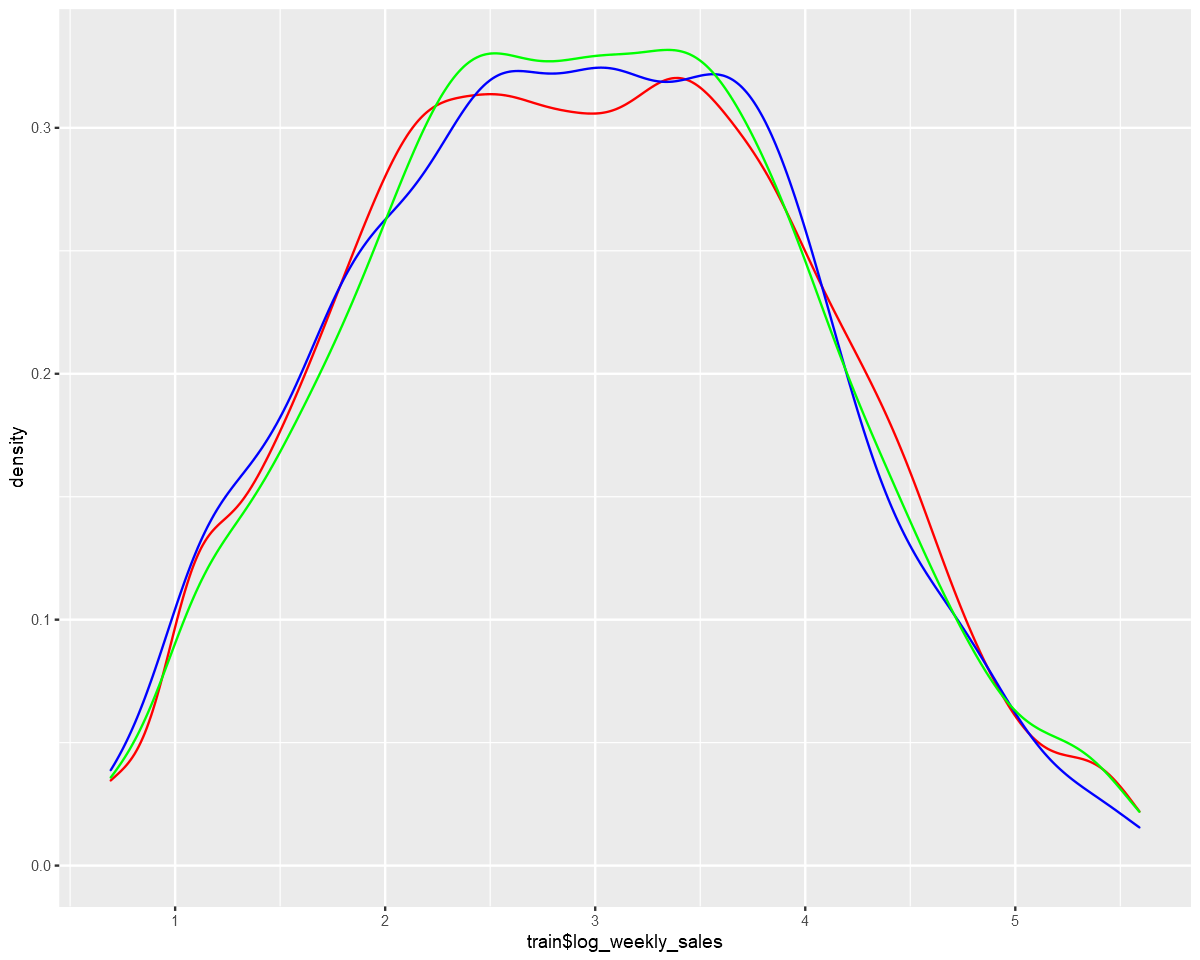

In [33]:
require(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 8)

ggplot() +
    geom_density(aes(x=train$log_weekly_sales),color="red",alpha=0.3) +
    geom_density(aes(x=dev$log_weekly_sales),color="blue",alpha=0.3) +
    geom_density(aes(x=test$log_weekly_sales),color="green",alpha=0.3)


## Save train partition data set to run prediction model in Python notebook as reference 

In [34]:
X_train_064 <- train[,-c(18)]
head(X_train_064)

,weekly_transactions,National_Ecuador_weekly_additionals,oil_weekly_max,item_nbr_695758,item_nbr_699745,item_nbr_741201,item_nbr_1110679,item_nbr_1247036,onpromotion_0,onpromotion_1,store_nbr_46,store_nbr_47,store_nbr_48,WW_2,item_class_2802,item_class_2850,city_Quito
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
7094,438,1,85,0,0,0,1,0,1,0,1,0,0,0,0,1,1
1989,240,1,206,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4078,624,1,128,0,0,0,0,1,1,0,1,0,0,0,0,0,1
2476,618,1,167,0,0,0,0,1,1,0,1,0,0,0,0,0,1
8229,925,1,110,1,0,0,0,0,0,1,0,1,0,0,1,0,1
1233,726,1,157,0,0,0,1,0,0,0,1,0,0,1,0,1,1


In [35]:
dim(X_train_064)

[1] 6368   17

In [36]:
y_train_064 <- train$log_weekly_sales
y_train_064

[1] 2.6390573 1.6094379 3.8286414 2.6390573 2.8332133 3.7612001 1.7917595
   [8] 2.7725887 3.2188758 4.4308168 2.8332133 3.1354942 2.8903718 2.1972246
  [15] 1.7917595 2.4849067 3.6888795 1.6094379 4.9487599 2.8332133 1.6094379
  [22] 3.9120230 3.7841896 1.3862944 4.2195077 1.6094379 5.1817835 2.0794415
  [29] 3.1354942 2.7725887 1.6094379 3.8501476 3.7376696 3.2958369 2.0794415
  [36] 3.8501476 4.2766661 2.3025851 3.2580965 1.3862944 0.6931472 1.3862944
  [43] 2.0794415 2.7080502 4.7706846 1.7917595 2.3978953 3.3672958 4.0430513
  [50] 3.7376696 4.0073332 2.7725887 2.5649494 2.8903718 4.2484952 4.0775374
  [57] 2.1972246 1.9459101 2.9957323 2.3978953 3.7612001 3.2188758 4.3438054
  [64] 3.8501476 2.5649494 1.0986123 3.2958369 3.2958369 3.6635616 4.0430513
  [71] 4.0430513 1.3862944 3.2188758 5.2781147 2.8332133 4.4188406 1.3862944
  [78] 3.7135721 4.3694479 4.2195077 2.1972246 3.9889840 3.2188758 4.1431347
  [85] 4.1588831 3.7135721 3.4011974 1.7917595 2.0794415 1.9459101 2.3025851
  [92] 3.1354942 1.3862944 4.3694479 4.0430513 2.8903718 2.9957323 4.8283137
  [99] 1.6094379 4.2766661 2.7725887 3.1780538 1.6094379 4.1431347 2.7080502
 [106] 4.2046926 3.4339872 4.1588831 2.3025851 1.6094379 2.1972246 3.0910425
 [113] 2.3025851 3.3672958 2.3978953 4.3438054 1.9459101 2.0794415 3.2958369
 [120] 3.7376696 4.2195077 2.3025851 2.0794415 3.4657359 5.2203558 1.9459101
 [127] 2.0794415 2.7725887 3.0910425 0.6931472 4.2046926 5.2040067 2.0794415
 [134] 4.0073332 4.2046926 2.8903718 3.1780538 4.2046926 2.5649494 2.7080502
 [141] 2.3978953 2.5649494 3.3322045 2.4849067 1.3862944 3.3322045 2.1972246
 [148] 3.9318256 2.9444390 2.8903718 1.0986123 2.3978953 2.0794415 2.3025851
 [155] 1.0986123 3.4339872 1.9459101 4.7449321 5.1179938 2.8903718 3.5553481
 [162] 2.4849067 3.9889840 4.4426513 1.9459101 3.9512437 3.0910425 1.3862944
 [169] 5.3981627 2.1972246 3.1354942 3.6888795 2.3978953 2.9957323 2.8903718
 [176] 0.6931472 2.0794415 3.9318256 1.3862944 2.1972246 3.7841896 5.3327188
 [183] 2.5649494 1.7917595 3.2188758 3.0910425 2.0794415 2.3978953 3.7135721
 [190] 1.9459101 5.1817835 2.4849067 3.4339872 4.6913479 2.5649494 2.7080502
 [197] 4.7874917 2.3978953 1.9459101 1.3862944 1.9459101 3.2958369 1.3862944
 [204] 3.9120230 2.7725887 4.3567088 2.0794415 3.2188758 2.9957323 3.7612001
 [211] 1.0986123 4.0430513 3.5263605 1.3862944 3.7376696 4.4426513 1.0986123
 [218] 2.4849067 3.7135721 3.7376696 4.5217886 2.7725887 3.2188758 3.0910425
 [225] 5.0106353 3.2958369 2.8903718 5.4249500 1.7917595 3.8712010 3.5835189
 [232] 1.0986123 2.5649494 2.7080502 3.5835189 3.3672958 4.8520303 2.4849067
 [239] 3.2958369 3.5553481 2.0794415 1.0986123 5.2933048 2.7080502 2.0794415
 [246] 3.7841896 3.0445224 3.2580965 1.9459101 2.8903718 2.0794415 3.3322045
 [253] 2.5649494 1.7917595 4.0430513 3.2958369 2.8903718 3.7841896 5.5721540
 [260] 0.6931472 2.5649494 2.7080502 1.9459101 4.8121844 2.3025851 3.7376696
 [267] 3.4657359 2.0794415 2.3025851 2.8332133 3.2188758 1.6094379 4.4773368
 [274] 2.3025851 3.1354942 4.0253517 3.9702919 4.1271344 3.0445224 1.9459101
 [281] 3.1354942 3.6635616 3.1354942 1.7917595 3.2580965 2.1972246 2.8903718
 [288] 2.7725887 2.4849067 2.8903718 1.3862944 1.6094379 1.3862944 3.4657359
 [295] 3.1780538 3.3322045 1.7917595 3.5553481 1.0986123 1.9459101 2.1972246
 [302] 4.5432948 3.7135721 5.0875963 2.0794415 1.6094379 3.0910425 1.6094379
 [309] 4.4543473 3.4657359 1.0986123 1.6094379 2.4849067 3.0910425 2.0794415
 [316] 3.5263605 3.3322045 4.1743873 2.4849067 2.3978953 1.0986123 1.9459101
 [323] 2.7725887 1.6094379 4.8283137 3.1354942 3.7135721 2.3978953 3.0910425
 [330] 1.3862944 4.4426513 3.4011974 5.2149358 3.6109179 2.1972246 3.4011974
 [337] 3.0910425 4.2484952 3.4339872 3.8918203 1.6094379 3.4339872 3.7376696
 [344] 2.0794415 4.1743873 2.9444390 2.1972246 2.1972246 4.3307333 4.0604430
 [351] 2.7080502 3.8918203 2.8332133 3.4965076 2.9957323 4.7706846 2.9444390
 [358] 2.3978953 2.0794415 3.1354942 3.4965076 5.2149358 2.9957323 2.4849067

In [240]:
write.csv(X_train_064,"C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/X_train_064.csv", row.names = TRUE)

In [241]:
write.csv(y_train_064,"C:/Users/beina/Documents/DS_Course/FAVORITA_Final_project/TABLES - DF/y_train_064.csv", row.names = TRUE)

## Regression Models  ##

In [37]:
### The error we will use is the RMSE and RMSLE since we don't have outliers 

rmse_dev <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle_dev <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}




In [38]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res <- NULL

In [39]:
# Linear Models

In [40]:
set.seed(3)
mod1 <- lm(log_weekly_sales ~., data=train)
summary(mod1)


Call:
lm(formula = log_weekly_sales ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.15643 -0.34835  0.04369  0.36735  3.08646 

Coefficients: (2 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.157e+00  4.926e-02  43.782  < 2e-16 ***
weekly_transactions                  3.556e-04  6.138e-05   5.794 7.20e-09 ***
National_Ecuador_weekly_additionals -1.186e-01  2.575e-02  -4.605 4.21e-06 ***
oil_weekly_max                       2.744e-04  1.549e-04   1.772 0.076472 .  
item_nbr_6957581                     1.026e+00  2.939e-02  34.930  < 2e-16 ***
item_nbr_6997451                     1.212e+00  2.913e-02  41.603  < 2e-16 ***
item_nbr_7412011                     1.789e+00  2.889e-02  61.912  < 2e-16 ***
item_nbr_11106791                    4.810e-01  2.877e-02  16.719  < 2e-16 ***
item_nbr_12470361                    8.634e-01  3.089e-02  27.951  < 2e-1

In [41]:
pred1 <- predict(mod1,newdata=dev)
rmse_dev(dev$log_weekly_sales,pred1)
rmsle_dev(dev$log_weekly_sales,pred1)
err_res <- rbind(err_res, data.frame(Name="Base Linear regression", Model="mod1", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred1), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred1)))

Warning message in predict.lm(mod1, newdata = dev):
"prediction from a rank-deficient fit may be misleading"


[1] 0.5886486

[1] 0.1744881

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




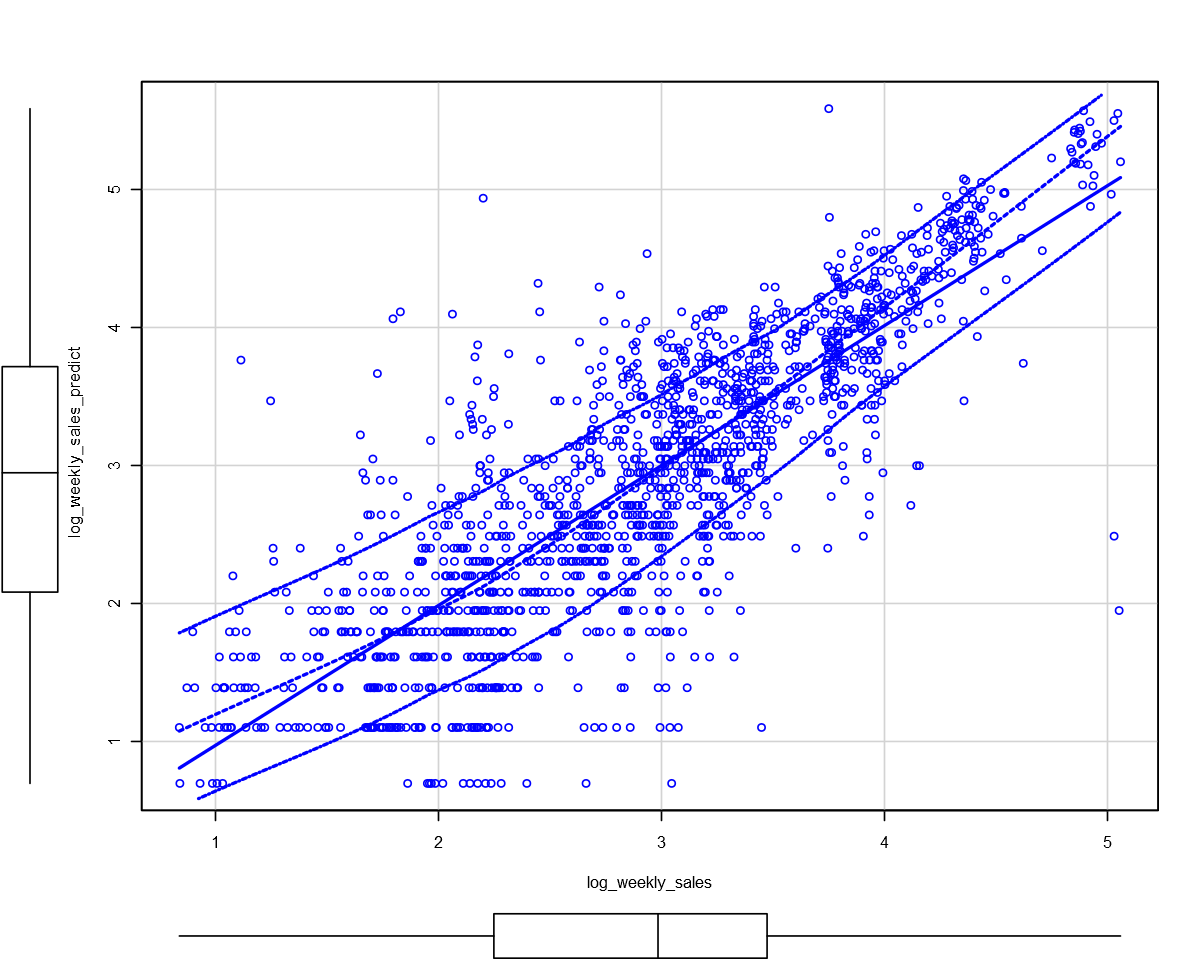

In [42]:
library(car)
scatterplot(log_weekly_sales ~ pred1 ,data=dev,
   xlab="log_weekly_sales", ylab="log_weekly_sales_predict")

In [43]:
# Desicion trees

In [44]:
library(tree)
library(rpart)

In [45]:
set.seed(3)
mod2 <- tree(log_weekly_sales ~., data=train)
mod2

node), split, n, deviance, yval
      * denotes terminal node

 1) root 6368 7232.00 2.960  
   2) onpromotion_1: 0 3915 3671.00 3.389  
     4) item_nbr_741201: 0 3301 2618.00 3.205  
       8) weekly_transactions < 580.5 1980 1344.00 2.899  
        16) item_class_2802: 0 1267  741.50 2.696  
          32) item_nbr_1247036: 0 984  494.90 2.498  
            64) item_nbr_1110679: 0 627  257.30 2.204 *
            65) item_nbr_1110679: 1 357   88.15 3.015 *
          33) item_nbr_1247036: 1 283   73.77 3.385 *
        17) item_class_2802: 1 713  457.60 3.260  
          34) city_Quito: 0 258  185.70 2.674 *
          35) city_Quito: 1 455  133.40 3.592 *
       9) weekly_transactions > 580.5 1321  811.20 3.664  
        18) item_class_2802: 0 817  374.30 3.283 *
        19) item_class_2802: 1 504  125.70 4.282 *
     5) item_nbr_741201: 1 614  342.40 4.376  
      10) store_nbr_47: 0 460  184.40 4.113 *
      11) store_nbr_47: 1 154   30.35 5.164 *
   3) onpromotion_1: 1 2453 1689.00 2

In [46]:
pred2 <- predict(mod2,newdata=dev)

rmse_dev(dev$log_weekly_sales,pred2)
rmsle_dev(dev$log_weekly_sales,pred2)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-tree", Model="mod2", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred2), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred2)))

[1] 0.6308729

[1] 0.1840876

In [47]:
set.seed(3)
mod3 <- rpart(log_weekly_sales ~., data=train)
mod3

n= 6368 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 6368 7231.57500 2.959807  
   2) onpromotion_1=1 2453 1689.21600 2.274913  
     4) item_nbr_741201=0 2032 1153.50600 2.124682  
       8) store_nbr_47=0 1449  670.54630 1.956170 *
       9) store_nbr_47=1 583  339.54860 2.543503  
        18) item_class_2802=0 380  207.90960 2.238903 *
        19) item_class_2802=1 203   30.38390 3.113691 *
     5) item_nbr_741201=1 421  268.49580 3.000019  
      10) weekly_transactions< 410 182   47.63470 2.449098 *
      11) weekly_transactions>=410 239  123.55600 3.419550 *
   3) onpromotion_1=0 3915 3670.74500 3.388938  
     6) item_nbr_741201=0 3301 2618.16100 3.205250  
      12) weekly_transactions< 580.5 1980 1343.88600 2.899319  
        24) item_class_2802=0 1267  741.51680 2.696470  
          48) item_nbr_1247036=0 984  494.92330 2.498402  
            96) item_nbr_1110679=0 627  257.30320 2.204311 *
            97) item_nbr_1110679=1 357   88.14837 3.01491

In [48]:
pred3 <- predict(mod3,newdata=dev)
rmse_dev(dev$log_weekly_sales,pred3)
rmsle_dev(dev$log_weekly_sales,pred3)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-rpart", Model="mod3", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred3), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred3)))

[1] 0.6308729

[1] 0.1840876

In [49]:
#Visualize the learned decision tree model
library(rpart.plot)
rpart.plot(mod3, box.palette="RdBu", shadow.col="gray", nn=TRUE,roundint=FALSE)

ERROR: Error in library(rpart.plot): there is no package called 'rpart.plot'


In [50]:
# Random Forest

In [51]:
library(randomForest)
library(ranger)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'ranger'


The following object is masked from 'package:randomForest':

    importance




In [52]:
set.seed(3)
mod4 <- randomForest(log_weekly_sales ~., data=train)
mod4


Call:
 randomForest(formula = log_weekly_sales ~ ., data = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.2578529
                    % Var explained: 77.29

In [53]:
pred4 <- predict(mod4,newdata=dev)
rmse_dev(dev$log_weekly_sales,pred4)
rmsle_dev(dev$log_weekly_sales,pred4)
err_res <- rbind(err_res, data.frame(Name="RandomForest (RF)", Model="mod4", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred4), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred4)))

[1] 0.4957582

[1] 0.1490027

In [54]:
R_squre <- tibble(pred4, obs = dev$log_weekly_sales) %>% 
  mutate(resid = pred4 - obs,
         resid_sq = resid^2)
sstot <- sum((R_squre$pred4 - mean(R_squre$obs))^2)
ssresid <- sum(R_squre$resid_sq)
sprintf("Percent of Variance Explained, R^2: %1.1f%%", 100 * (1 - ssresid / sstot))

[1] "Percent of Variance Explained, R^2: 67.8%"

In [55]:
mod5 <- ranger(log_weekly_sales ~., data=train)
mod5

Ranger result

Call:
 ranger(log_weekly_sales ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      6368 
Number of independent variables:  17 
Mtry:                             4 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       0.2734207 
R squared (OOB):                  0.7592683 

In [56]:
pred5 <- predict(mod5,data=dev)

rmse_dev(dev$log_weekly_sales,pred5$predictions)
rmsle_dev(dev$log_weekly_sales,pred5$predictions)
err_res <- rbind(err_res, data.frame(Name="RandomForest (ranger)", Model="mod5", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred5$predictions), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred5$predictions)))

[1] 0.5101627

[1] 0.1543961

In [57]:
#  KNN

In [58]:
train_num <- train
train_num[] <- sapply(train_num[], as.numeric) 

In [59]:
dev_num <- dev
dev_num[] <- sapply(dev_num[], as.numeric) 

In [60]:
### adaboost needs that values to be normalized
min_max <- function(x) { (x -min(x))/(max(x)-min(x))   }

In [61]:
train1 <- Matrix::sparse.model.matrix(log_weekly_sales ~ .-1, data = train_num)

In [62]:
dev1 <- Matrix::sparse.model.matrix(log_weekly_sales ~ .-1, data = dev_num)

In [63]:
X_train <- sapply(data.frame(as.matrix(train1)),min_max)

In [64]:
X_dev <- sapply(data.frame(as.matrix(dev1)),min_max)

In [65]:
library(class)
mod6 <- knn(X_train,X_dev,cl=train$log_weekly_sales)

In [66]:
str(mod6)

 Factor w/ 247 levels "0.693147181",..: 45 29 55 80 21 12 17 6 61 2 ...


In [67]:
pred6 <- as.numeric(as.character(mod6))

rmse_dev(dev$log_weekly_sales,pred6)
rmsle_dev(dev$log_weekly_sales,pred6)
err_res <- rbind(err_res, data.frame(Name="kNN", Model="mod6", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred6), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred6)))

[1] 0.6843906

[1] 0.2046648

In [68]:
# SVM

In [69]:
#install.packages("liquidSVM")
library(liquidSVM)
mod7 <- svm(log_weekly_sales ~., train)

Warning message:
"package 'liquidSVM' was built under R version 4.0.3"


In [70]:
pred7 <- predict(mod7, newdata=dev)

rmse_dev(dev$log_weekly_sales,pred7)
rmsle_dev(dev$log_weekly_sales,pred7)
err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod7", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred7), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred7)))

[1] 0.4977178

[1] 0.1493421

In [71]:
# XGBoost

In [72]:
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 4.0.3"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [73]:
summary(train_num)

 weekly_transactions National_Ecuador_weekly_additionals oil_weekly_max 
 Min.   :  1.0       Min.   :1.00                        Min.   :  1.0  
 1st Qu.:272.0       1st Qu.:1.00                        1st Qu.: 53.0  
 Median :493.0       Median :1.00                        Median :105.0  
 Mean   :491.3       Mean   :1.07                        Mean   :106.1  
 3rd Qu.:720.0       3rd Qu.:1.00                        3rd Qu.:156.0  
 Max.   :942.0       Max.   :3.00                        Max.   :212.0  
 item_nbr_695758 item_nbr_699745 item_nbr_741201 item_nbr_1110679
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00    
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.00    
 Median :1.000   Median :1.000   Median :1.000   Median :1.00    
 Mean   :1.149   Mean   :1.155   Mean   :1.163   Mean   :1.15    
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.00    
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.00    
 item_nbr_1247036 onpromoti

In [74]:
summary(dev_num)

 weekly_transactions National_Ecuador_weekly_additionals oil_weekly_max  
 Min.   :  1.0       Min.   :1.000                       Min.   :  1.00  
 1st Qu.:272.0       1st Qu.:1.000                       1st Qu.: 51.75  
 Median :488.5       Median :1.000                       Median :102.00  
 Mean   :488.9       Mean   :1.077                       Mean   :104.82  
 3rd Qu.:720.2       3rd Qu.:1.000                       3rd Qu.:154.00  
 Max.   :942.0       Max.   :3.000                       Max.   :212.00  
 item_nbr_695758 item_nbr_699745 item_nbr_741201 item_nbr_1110679
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000   
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   
 Median :1.000   Median :1.000   Median :1.000   Median :1.000   
 Mean   :1.162   Mean   :1.148   Mean   :1.143   Mean   :1.156   
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000   
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000   
 item_nbr_1247036 on

In [75]:
train1 <- Matrix::sparse.model.matrix(log_weekly_sales ~ .-1, data = train_num)

In [76]:
dev1 <- Matrix::sparse.model.matrix(log_weekly_sales ~ .-1, data = dev_num)

In [77]:
#X_train <- xgb.DMatrix(train1)
X_train <- train1
y_train <- train$log_weekly_sales
set.seed(3)
mod8 <- xgboost(data=X_train,label=y_train, nrounds=1000,print_every_n = 20)

[1]	train-rmse:1.922738 
[21]	train-rmse:0.440825 
[41]	train-rmse:0.397314 
[61]	train-rmse:0.357611 
[81]	train-rmse:0.336481 
[101]	train-rmse:0.318494 
[121]	train-rmse:0.300033 
[141]	train-rmse:0.283594 
[161]	train-rmse:0.271744 
[181]	train-rmse:0.260659 
[201]	train-rmse:0.251044 
[221]	train-rmse:0.242182 
[241]	train-rmse:0.232048 
[261]	train-rmse:0.223124 
[281]	train-rmse:0.217393 
[301]	train-rmse:0.209504 
[321]	train-rmse:0.202210 
[341]	train-rmse:0.193250 
[361]	train-rmse:0.187420 
[381]	train-rmse:0.180153 
[401]	train-rmse:0.174642 
[421]	train-rmse:0.168249 
[441]	train-rmse:0.162328 
[461]	train-rmse:0.158406 
[481]	train-rmse:0.152520 
[501]	train-rmse:0.147666 
[521]	train-rmse:0.143268 
[541]	train-rmse:0.139005 
[561]	train-rmse:0.134696 
[581]	train-rmse:0.131150 
[601]	train-rmse:0.127311 
[621]	train-rmse:0.124141 
[641]	train-rmse:0.120848 
[661]	train-rmse:0.117985 
[681]	train-rmse:0.115378 
[701]	train-rmse:0.112472 
[721]	train-rmse:0.109841 
[741]	t

In [78]:
#X_test <- xgb.DMatrix(test1)
X_dev <- dev1
y_dev <- dev$log_weekly_sales

pred8 <- predict(mod8,newdata=X_dev)
rmse_dev(y_dev,pred8)
rmsle_dev(y_dev,pred8)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod8", 
                                     RMSE_Dev=rmse_dev(y_dev,pred8), 
                                     RMSLE_Dev=rmsle_dev(y_dev,pred8)))

[1] 0.5418664

[1] 0.1617597

In [79]:
library(gbm)
# for reproducibility
set.seed(3)

# train GBM model
mod9 <- gbm(formula = log_weekly_sales ~ ., distribution = "gaussian",  data = train,  n.trees = 24000, interaction.depth = 1,
  shrinkage = 0.001,
  cv.folds = 5,
  n.cores = NULL, # will use all cores by default
  verbose = FALSE
  )  


Loaded gbm 2.1.5



In [80]:
print(mod9)

gbm(formula = log_weekly_sales ~ ., distribution = "gaussian", 
    data = train, n.trees = 24000, interaction.depth = 1, shrinkage = 0.001, 
    cv.folds = 5, verbose = FALSE, n.cores = NULL)
A gradient boosted model with gaussian loss function.
24000 iterations were performed.
The best cross-validation iteration was 24000.
There were 17 predictors of which 16 had non-zero influence.


In [81]:
pred9 <- predict(mod9,newdata=dev)

rmse_dev(dev$log_weekly_sales,pred9)
rmsle_dev(dev$log_weekly_sales,pred9)
err_res <- rbind(err_res, data.frame(Name="GBM", Model="mod9", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred9), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred9)))

Using 24000 trees...


[1] 0.6030014

[1] 0.1786473

[1] 24000

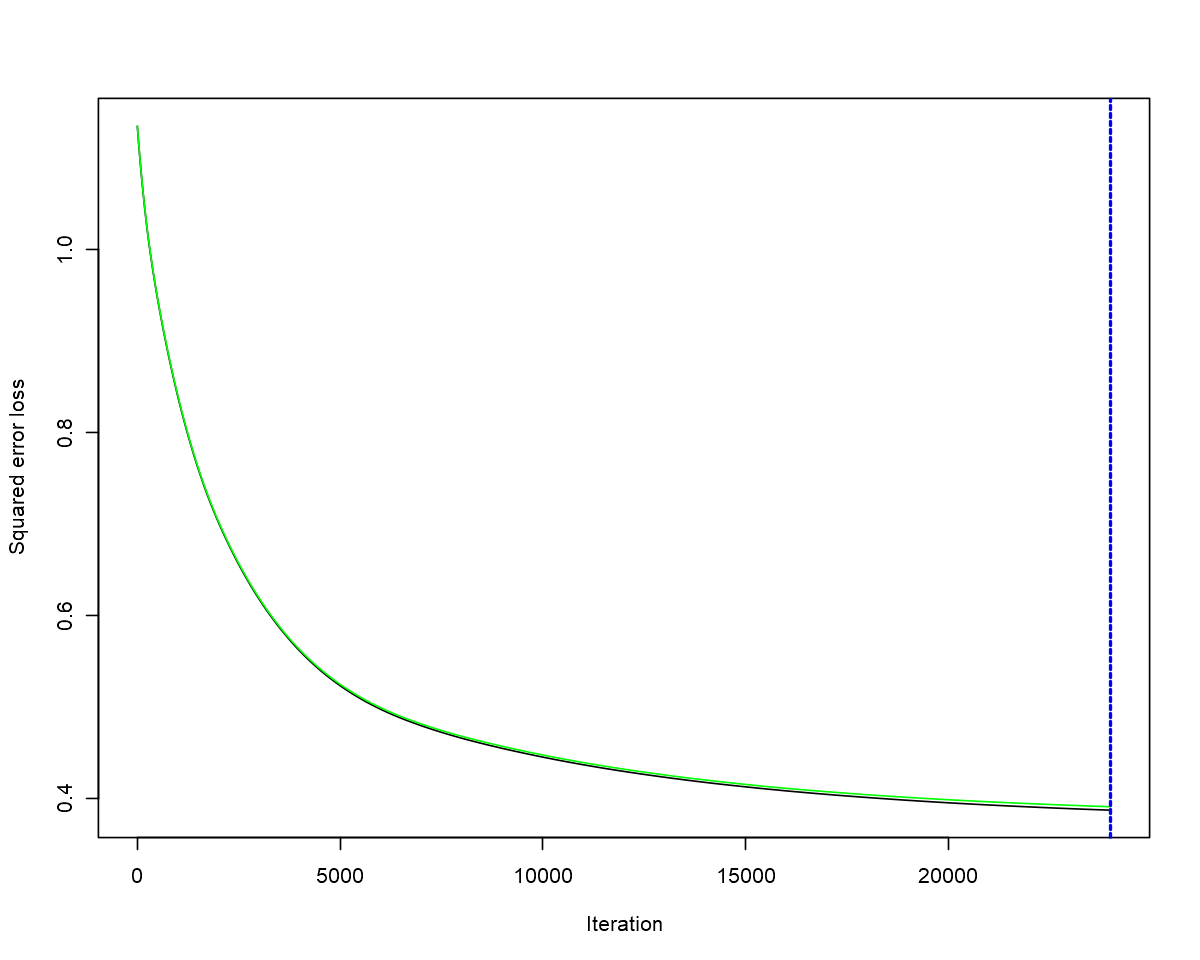

In [82]:
gbm.perf(mod9, method = "cv")

In [83]:
mod10 <- gbm(formula = log_weekly_sales ~ .,distribution = "gaussian", data = train, n.trees = 200, interaction.depth = 3,
  shrinkage = 0.1,
  cv.folds = 5,
  n.cores = NULL, # will use all cores by default
  verbose = FALSE
  )   

In [84]:
print(mod10)

gbm(formula = log_weekly_sales ~ ., distribution = "gaussian", 
    data = train, n.trees = 200, interaction.depth = 3, shrinkage = 0.1, 
    cv.folds = 5, verbose = FALSE, n.cores = NULL)
A gradient boosted model with gaussian loss function.
200 iterations were performed.
The best cross-validation iteration was 200.
There were 17 predictors of which 17 had non-zero influence.


In [85]:
pred10 <- predict(mod10,newdata=dev)

rmse_dev(dev$log_weekly_sales,pred10)
rmsle_dev(dev$log_weekly_sales,pred10)
err_res <- rbind(err_res, data.frame(Name="GBM", Model="mod10", 
                                     RMSE_Dev=rmse_dev(dev$log_weekly_sales,pred10), 
                                     RMSLE_Dev=rmsle_dev(dev$log_weekly_sales,pred10)))

Using 200 trees...


[1] 0.5170288

[1] 0.1552648

[1] 200

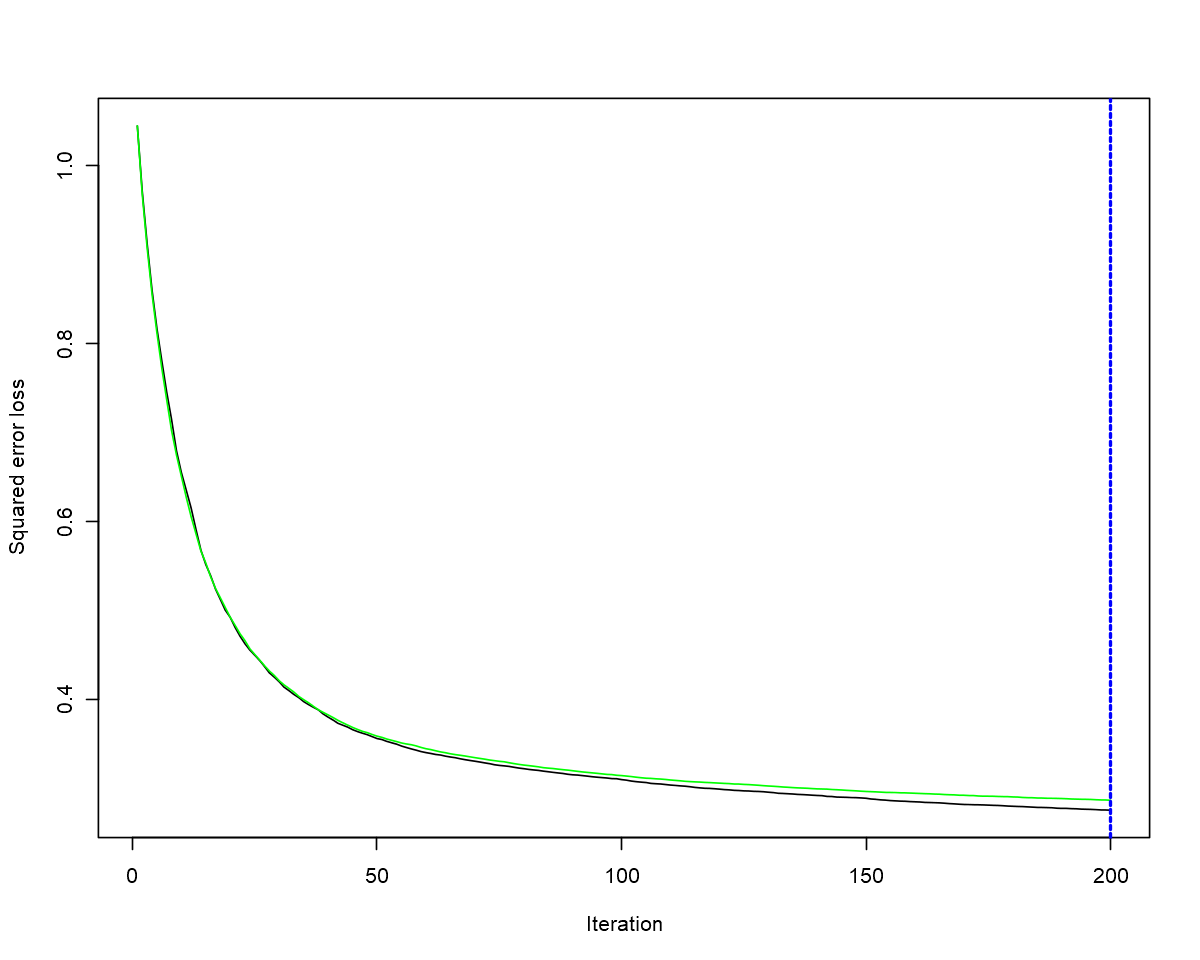

In [86]:
gbm.perf(mod10, method = "cv")

In [87]:
Results_Dev <-err_res %>% arrange(RMSE_Dev) 
Results_Dev

Name,Model,RMSE_Dev,RMSLE_Dev
<chr>,<chr>,<dbl>,<dbl>
RandomForest (RF),mod4,0.4957582,0.1490027
SVM,mod7,0.4977178,0.1493421
RandomForest (ranger),mod5,0.5101627,0.1543961
GBM,mod10,0.5170288,0.1552648
XGBoost,mod8,0.5418664,0.1617597
Base Linear regression,mod1,0.5886486,0.1744881
GBM,mod9,0.6030014,0.1786473
Decision Trees-tree,mod2,0.6308729,0.1840876
Decision Trees-rpart,mod3,0.6308729,0.1840876


In [88]:
### The error we will use is the RMSE and RMSLE since we don't have outliers 

rmse_train <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle_train <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}




In [89]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res_train <- NULL

In [90]:
pred1_train <- predict(mod1,newdata=train)
rmse_train(train$log_weekly_sales,pred1_train)
rmsle_train(train$log_weekly_sales,pred1_train)
err_res_train <- rbind(err_res_train, data.frame(Name="Base Linear regression", Model="mod1", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred1_train), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred1_train)))

Warning message in predict.lm(mod1, newdata = train):
"prediction from a rank-deficient fit may be misleading"


[1] 0.609412

[1] 0.1792789

In [91]:
pred2_train <- predict(mod2,newdata=train)

rmse_train(train$log_weekly_sales,pred2_train)
rmsle_train(train$log_weekly_sales,pred2_train)
err_res_train <- rbind(err_res_train, data.frame(Name="Decision Trees-tree", Model="mod2", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred2_train), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred2_train)))

[1] 0.6307036

[1] 0.1829567

In [92]:
pred3_train <- predict(mod3,newdata=train)
rmse_train(train$log_weekly_sales,pred3_train)
rmsle_train(train$log_weekly_sales,pred3_train)
err_res_train <- rbind(err_res_train, data.frame(Name="Decision Trees-rpart", Model="mod3", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred3_train), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred3_train)))

[1] 0.6307036

[1] 0.1829567

In [93]:
pred4_train <- predict(mod4,newdata=train)
rmse_train(train$log_weekly_sales,pred4_train)
rmsle_train(train$log_weekly_sales,pred4_train)
err_res_train <- rbind(err_res_train, data.frame(Name="RandomForest (RF)", Model="mod4", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred4_train), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred4_train)))

[1] 0.4262683

[1] 0.1280232

In [94]:
pred5_train <- predict(mod5,data=train)

rmse_train(train$log_weekly_sales,pred5_train$predictions)
rmsle_train(train$log_weekly_sales,pred5_train$predictions)
err_res_train <- rbind(err_res_train, data.frame(Name="RandomForest (ranger)", Model="mod5", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred5_train$predictions), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred5_train$predictions)))

[1] 0.468134

[1] 0.1406535

In [95]:
pred7_train <- predict(mod7, newdata=train)
rmse_train(train$log_weekly_sales,pred7_train)
rmsle_train(train$log_weekly_sales,pred7_train)
err_res_train <- rbind(err_res_train, data.frame(Name="SVM", Model="mod7", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred7_train), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred7_train)))

[1] 0.4934169

[1] 0.1462277

In [96]:
pred8_train <- predict(mod8,newdata=X_train)
rmse_train(y_train,pred8_train)
rmsle_train(y_train,pred8_train)
err_res_train <- rbind(err_res_train, data.frame(Name="XGBoost", Model="mod8", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred8_train), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred8_train)))

[1] 0.08013069

[1] 0.02776829

In [97]:
pred9_train<- predict(mod9,newdata=train)
rmse_train(train$log_weekly_sales,pred9_train)
rmsle_train(train$log_weekly_sales,pred9_train)
err_res_train <- rbind(err_res_train, data.frame(Name="GBM", Model="mod9", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred9_train), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred9_train)))

Using 24000 trees...


[1] 0.6221854

[1] 0.1823278

In [98]:
pred10_train <- predict(mod10,newdata=train)

rmse_train(train$log_weekly_sales,pred10_train)
rmsle_train(train$log_weekly_sales,pred10_train)
err_res_train <- rbind(err_res_train, data.frame(Name="GBM", Model="mod10", 
                                     RMSE_Train=rmse_train(train$log_weekly_sales,pred10_train), 
                                     RMSLE_Train=rmsle_train(train$log_weekly_sales,pred10_train)))

Using 200 trees...


[1] 0.5248808

[1] 0.1560759

In [100]:
Results_Train <-err_res_train %>% arrange(RMSE_Train) 
Results_Train

Name,Model,RMSE_Train,RMSLE_Train
<chr>,<chr>,<dbl>,<dbl>
XGBoost,mod8,0.08013069,0.02776829
RandomForest (RF),mod4,0.42626830,0.12802322
RandomForest (ranger),mod5,0.46813395,0.14065353
SVM,mod7,0.49341688,0.14622767
GBM,mod10,0.52488079,0.15607587
Base Linear regression,mod1,0.60941196,0.17927886
GBM,mod9,0.62218536,0.18232785
Decision Trees-tree,mod2,0.63070361,0.18295666
Decision Trees-rpart,mod3,0.63070361,0.18295666


In [101]:
left_join(Results_Dev, Results_Train)

Joining, by = c("Name", "Model")



Name,Model,RMSE_Dev,RMSLE_Dev,RMSE_Train,RMSLE_Train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
RandomForest (RF),mod4,0.4957582,0.1490027,0.42626830,0.12802322
SVM,mod7,0.4977178,0.1493421,0.49341688,0.14622767
RandomForest (ranger),mod5,0.5101627,0.1543961,0.46813395,0.14065353
GBM,mod10,0.5170288,0.1552648,0.52488079,0.15607587
XGBoost,mod8,0.5418664,0.1617597,0.08013069,0.02776829
Base Linear regression,mod1,0.5886486,0.1744881,0.60941196,0.17927886
GBM,mod9,0.6030014,0.1786473,0.62218536,0.18232785
Decision Trees-tree,mod2,0.6308729,0.1840876,0.63070361,0.18295666
Decision Trees-rpart,mod3,0.6308729,0.1840876,0.63070361,0.18295666


# Model 4 RandomForest (RF)
### RMSLE_Train ~ 0.4811109 vs. RMSLE_Dev ~ 0.5395557 -----> no over fitting ------> can proceed

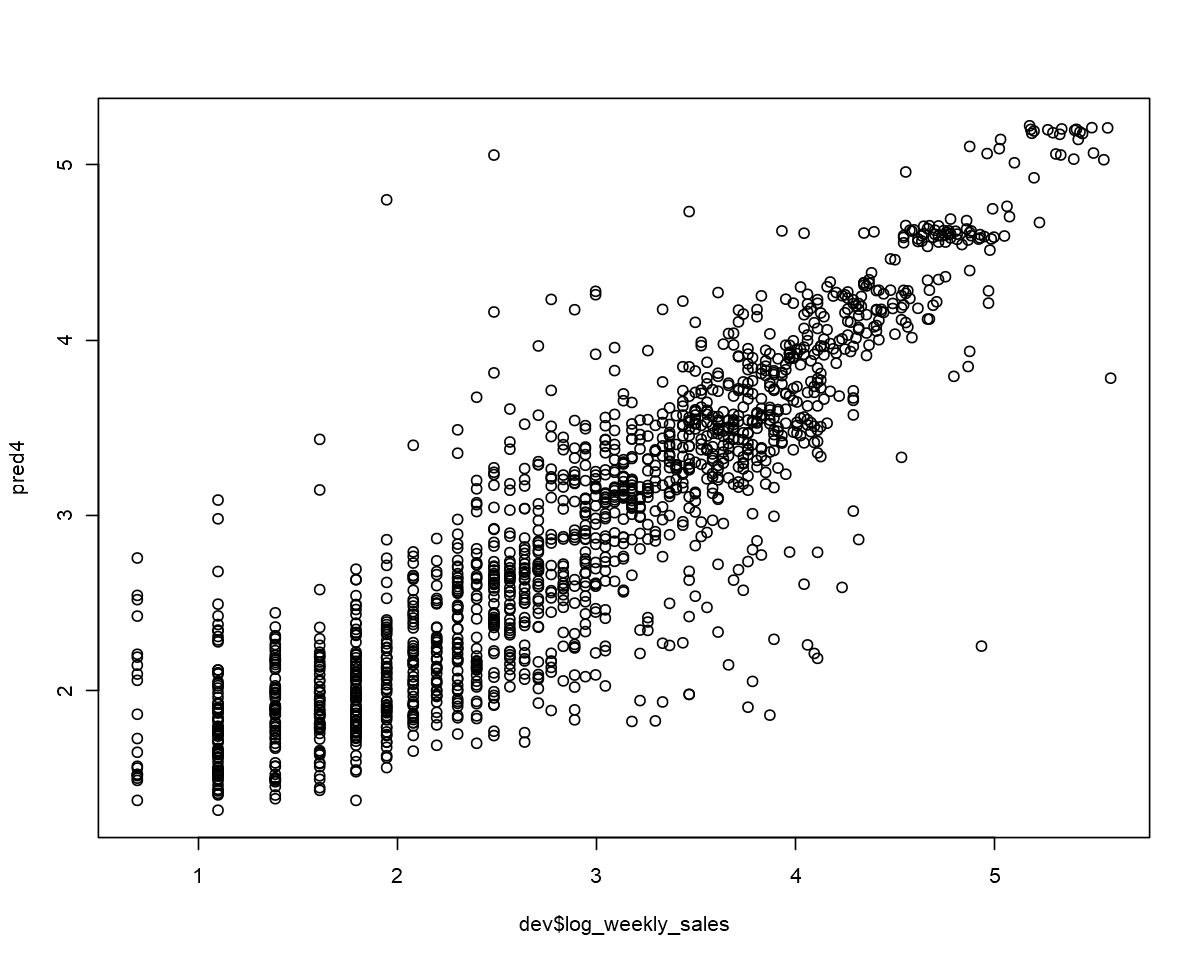

In [102]:
plot(pred4 ~ dev$log_weekly_sales)

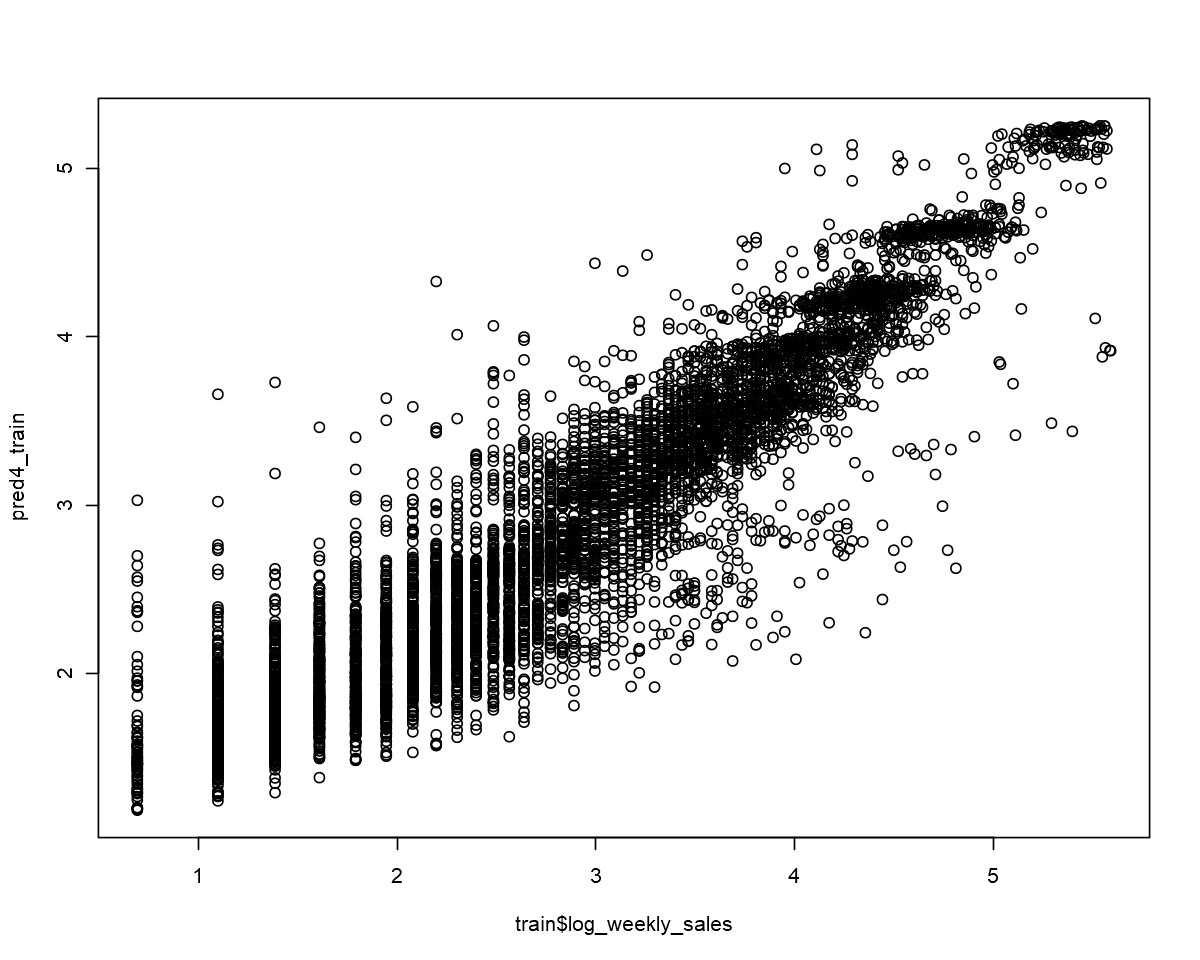

In [309]:
plot(pred4_train ~ train$log_weekly_sales)

In [103]:
importance <- randomForest.importance(feature_names = X_train@Dimnames[[2]], model = mod4)
print(randomForest.plot.importance(importance_matrix = importance))

ERROR: Error in randomForest.importance(feature_names = X_train@Dimnames[[2]], : could not find function "randomForest.importance"


In [ ]:
print(xgb.plot.importance(importance_matrix = importance, top_n = 5))